In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src')) # include top level package in python path

In [2]:
import torch
from torch import nn, Tensor
from model.fuzzy_logic import ProductLogic, MinimumLogic, LukasiewiczLogic, DrasticLogic, SchweizerSklarLogic
from model.fuzzy_layer import FuzzyParam
from model.bool_logic import BoolLogic
from plot import gauss_filter

logic = BoolLogic()

In [3]:
class FuzzyToy(nn.Module):
    def __init__(self, logic, N=1):
        super().__init__()
        self._logic = logic
        self.a = FuzzyParam((N,))
        self.b = FuzzyParam((N,))
        self.c = FuzzyParam((N,))
    
    def forward(self):
        a = self.a.value()
        b = self.b.value()
        c = self.c.value()
        l = self._logic
        return l.bin_disjoin(
            l.bin_conjoin(a, b),
            l.bin_conjoin(c, l.neg(a))
        )

In [4]:
def train_toy(model, optim, steps=200):

    outputs = []

    for _ in range(200):
        output = model()
        outputs.append(output)
        loss = model._logic.neg(output).sum()

        optim.zero_grad()
        loss.backward()
        optim.step()

    return torch.cat([output.unsqueeze(-1) for output in outputs], dim=-1)

In [5]:
import matplotlib.pyplot as plt

def plot_grads(outputs, ax):
    ax.plot(outputs.transpose(1,0), color='indigo', alpha=0.008)
    ax.set_xlim(0, outputs.shape[-1] - 1)
    ax.set_ylabel("ϕ")
    ax.set_xlabel("Step")

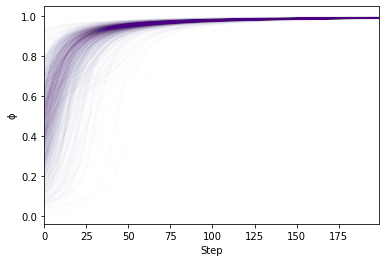

In [13]:
fig, ax = plt.subplots()

prod_model = FuzzyToy(logic=ProductLogic(), N=1000)
optim = torch.optim.SGD(prod_model.parameters(), lr=1e-0)
prod_outputs = train_toy(prod_model, optim)
plot_grads(prod_outputs.detach().numpy(), ax)

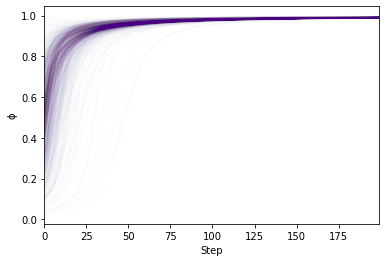

In [14]:
fig, ax = plt.subplots()

min_model = FuzzyToy(logic=MinimumLogic(), N=1000)
optim = torch.optim.SGD(min_model.parameters(), lr=1e-0)
min_outputs = train_toy(min_model, optim)
plot_grads(min_outputs.detach().numpy(), ax)

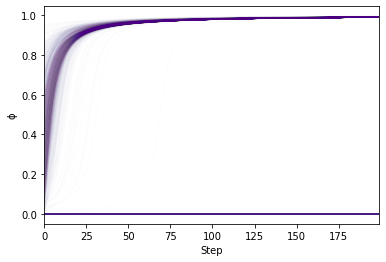

In [15]:
fig, ax = plt.subplots()

luk_model = FuzzyToy(logic=LukasiewiczLogic(), N=1000)
optim = torch.optim.SGD(luk_model.parameters(), lr=1e-0)
luk_outputs = train_toy(luk_model, optim)
plot_grads(luk_outputs.detach().numpy(), ax)

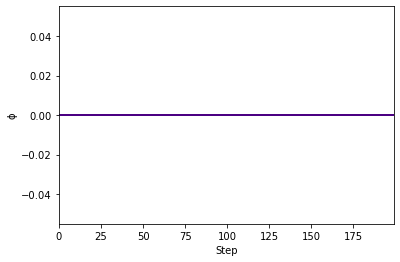

In [16]:
fig, ax = plt.subplots()

luk_model = FuzzyToy(logic=DrasticLogic(), N=1000)
optim = torch.optim.SGD(luk_model.parameters(), lr=1e-0)
luk_outputs = train_toy(luk_model, optim)
plot_grads(luk_outputs.detach().numpy(), ax)

In [10]:
def crispen(value):
    return (value > 0.5).float()

def zip_tensors(*args):
    return torch.cat([arg.unsqueeze(0) for arg in args], dim=0)

In [11]:
logic.conjoin(zip_tensors(
    crispen(prod_model.a.value()),
    crispen(prod_model.b.value()),
    crispen(prod_model.c.value())
).transpose(1,0) == torch.Tensor([0,0,1]), dim=1)

tensor([False,  True, False, False, False, False, False, False,  True,  True,
        False,  True, False,  True, False, False, False, False,  True, False,
         True, False, False, False, False,  True, False, False, False,  True,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False,  True,  True, False, False, False, False, False,
        False, False,  True, False,  True, False, False, False,  True,  True,
        False, False, False,  True, False, False, False,  True, False, False,
        False, False, False,  True, False, False, False, False, False,  True,
         True, False, False, False,  True, False, False,  True, False, False,
        False, False, False, False,  True, False, False, False,  True, False,
        False, False,  True, False, False, False, False,  True,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False,  True, False, 

In [12]:
prod_outputs[:,-1]

tensor([0.8841, 0.8782, 0.9284, 0.4125, 0.7694, 0.7614, 0.3803, 0.8145, 0.9047,
        0.8689, 0.8248, 0.4697, 0.6088, 0.8404, 0.9094, 0.8341, 0.9537, 0.9315,
        0.8717, 0.7831, 0.9026, 0.9003, 0.8647, 0.7790, 0.8159, 0.8286, 0.6668,
        0.9082, 0.9148, 0.8868, 0.9455, 0.8515, 0.8609, 0.7984, 0.7143, 0.8643,
        0.8818, 0.8336, 0.8427, 0.9255, 0.8949, 0.8087, 0.7934, 0.8349, 0.8371,
        0.4180, 0.8997, 0.9193, 0.8027, 0.8651, 0.9213, 0.9185, 0.6263, 0.8193,
        0.8762, 0.8819, 0.7783, 0.9002, 0.8886, 0.9073, 0.5355, 0.7136, 0.9187,
        0.8678, 0.5742, 0.8127, 0.9046, 0.8788, 0.9038, 0.8845, 0.9120, 0.3686,
        0.8916, 0.5650, 0.9030, 0.7286, 0.6648, 0.9393, 0.8348, 0.7425, 0.8410,
        0.8604, 0.6870, 0.9679, 0.7684, 0.8651, 0.6078, 0.7141, 0.5705, 0.8392,
        0.8646, 0.8283, 0.2207, 0.8353, 0.9047, 0.9106, 0.9328, 0.2911, 0.9214,
        0.7437, 0.0652, 0.9070, 0.8561, 0.9148, 0.8148, 0.8303, 0.9132, 0.8857,
        0.9104, 0.8913, 0.8576, 0.7637, 